# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings

<module 'warnings' from 'C:\\ProgramData\\Anaconda3\\lib\\warnings.py'>

In [2]:
bank=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Forecast Gold Price\Intershala task\bank.csv")
bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [3]:
bank = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Forecast Gold Price\Intershala task\bank.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.shape

(4521, 17)

In [5]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## No Null values in given dataset

In [9]:
bank.duplicated().sum()

0

## No duplicate values in given dataset

In [10]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [11]:
100*bank['y'].value_counts()/len(bank['y'])

no     88.476001
yes    11.523999
Name: y, dtype: float64

## the term deposit data shows high variation 88.47% are no and 11.53% are yes. Data is highly imbalanced, ratio = 88:11. So we'll analyse the data with other features while taking the target values separately to get some insights.

## We'll copy the data in another dataframe to avoid data loss of orignal data.

In [12]:
churn = bank.copy()

In [13]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Cleaning

In [14]:
## We can drop 'day' & 'month' columns as 'pdays' gives the number of days that passed by after the client was last contacted from a previous campaign

In [15]:
churn.drop(["day","month"],axis =1, inplace = True)

## There are many unknown entries we need to replace them as null/Nan

In [16]:
for i in churn.columns:
    churn[i] = np.where(churn[i] == "unknown", np.nan, churn[i])
churn.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [17]:
(3705/churn.poutcome.shape[0])*100

81.95089581950896

## After replacing unknown values as null we find 'poutcome' has 3705 null entries i.e. about 81.9% null values, this feature is of no need we can simply drop it.

In [18]:
(1324/churn.contact.shape[0])*100

29.285556292855563

## Similarly it doesnt matter if 'contact' was through cellular or telephone it doesnt affect the target variable, so we can drop this feature

In [19]:
churn.drop("poutcome", inplace = True, axis = 1)

In [20]:
churn.drop("contact", inplace = True, axis = 1)

# Data Pre-processing

## As 'job' & 'education' has lower null values we'll fill them using fillna method instead of dropping

In [21]:
churn["job"].fillna(method = "ffill",inplace=True)

In [22]:
churn["education"].fillna(method = "ffill",inplace= True)

## Now we need to convert all categorical data to numerical data. This will allow us to perform calculations on our data

## I decided to replace yes and no as 1 & 0 respectively, by defining a map function including the target variable

In [23]:
varlist=['default','housing','loan','y']

In [24]:
def binary_map(q):
    return q.map({'yes':1,'no':0})

In [25]:
churn[varlist]=churn[varlist].apply(binary_map)

In [26]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0


# One Hot Encoder

## Now I dont think of using label encoding for the features 'job', 'marital' & 'education' as it is only recommended for target variable instead we can use the One Hot Encoder and dummy variables

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
one = OneHotEncoder()
churn[list(churn["job"].unique())] = one.fit_transform(churn[["job"]]).A

In [29]:
churn.drop("job",axis = 1, inplace = True)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
edu=pd.get_dummies(churn['education'])
edu

,primary,secondary,tertiary
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,0,1
4518,0,1,0
4519,0,1,0


In [31]:
edu=pd.get_dummies(churn['education'],drop_first=True)

## we can drop the primary column as it can be predicted with the help of other dummy variables

In [32]:
status=pd.get_dummies(churn['marital'])

In [33]:
status

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


In [34]:
status=pd.get_dummies(churn['marital'],drop_first=True)

In [35]:
status

,married,single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
4516,1,0
4517,1,0
4518,1,0
4519,1,0


In [36]:
churn=pd.concat([churn,edu,status],axis=1)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [37]:
churn.drop("marital",axis = 1, inplace = True)
churn.drop("education",axis = 1, inplace = True)
churn

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


## Univariate analysis

In [38]:
churn_d = churn.copy()

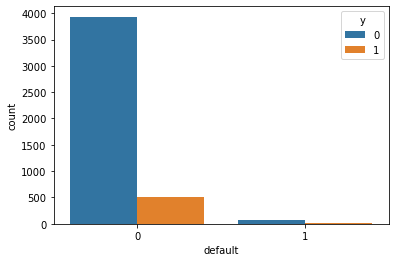

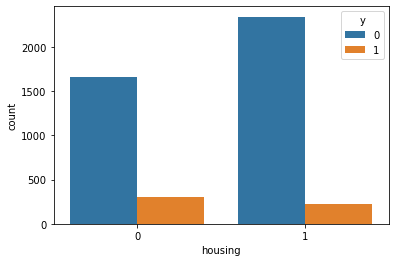

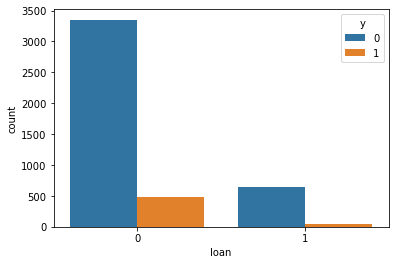

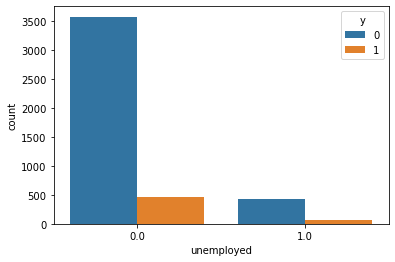

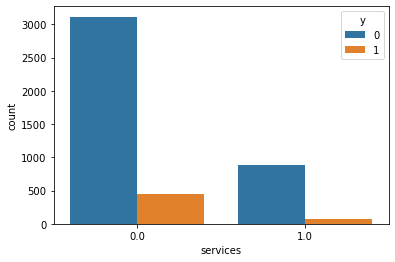

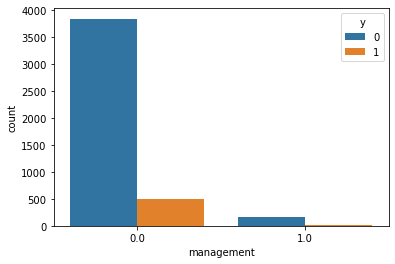

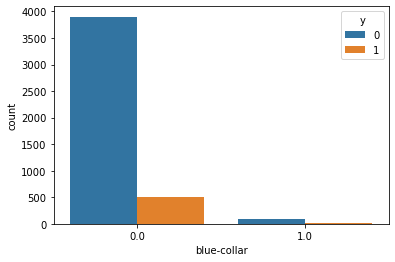

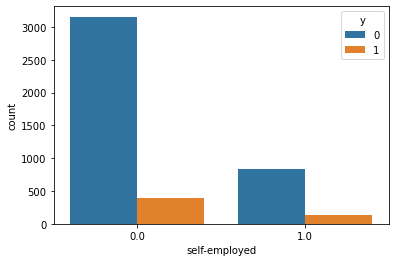

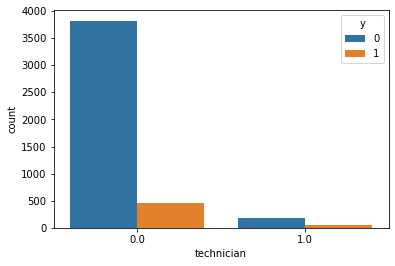

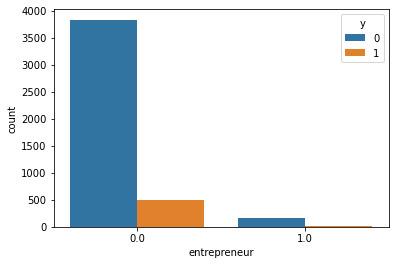

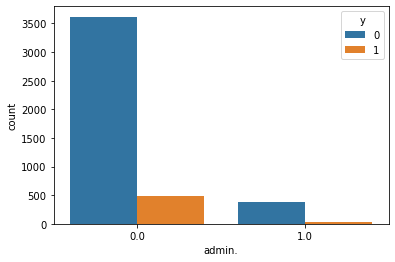

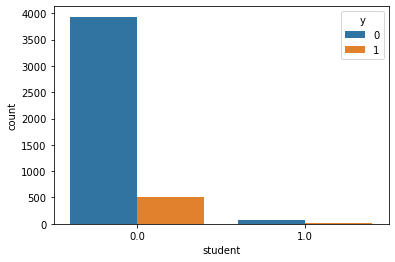

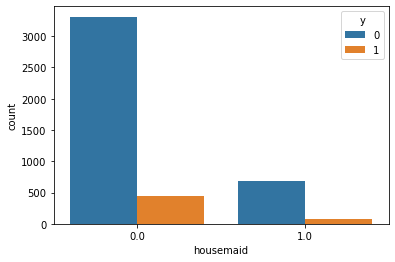

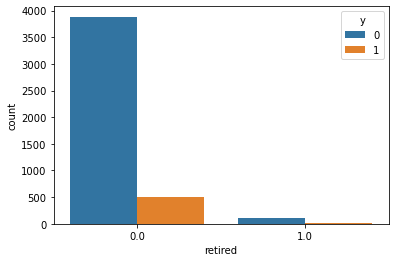

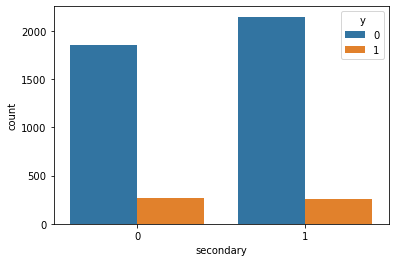

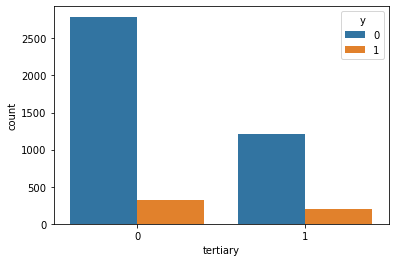

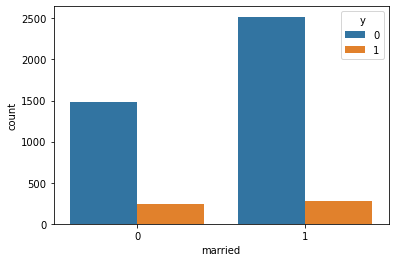

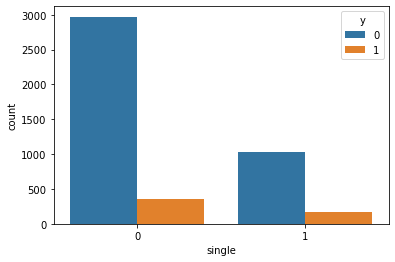

In [39]:
for i,predictor in enumerate(churn_d.drop(columns=['y','age','campaign','previous', 'balance', 'duration','pdays'])):
    plt.figure(i)
    sns.countplot(data=churn_d, x=predictor, hue='y')

<AxesSubplot:>

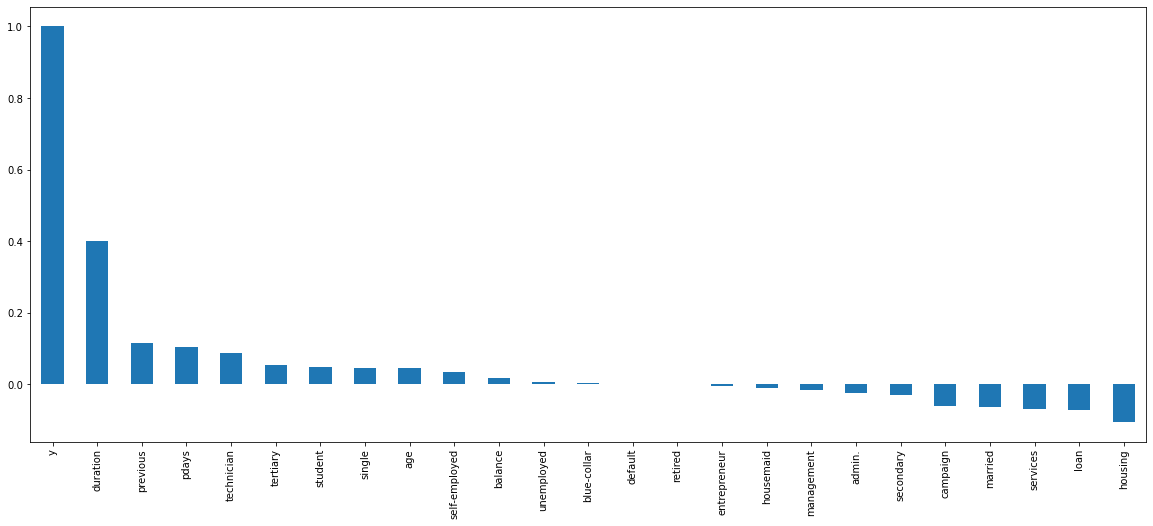

In [40]:
plt.figure(figsize=(20,8))
churn_d.corr()['y'].sort_values(ascending = False).plot(kind='bar')

## Heatmap to gain insights about correlation

<AxesSubplot:>

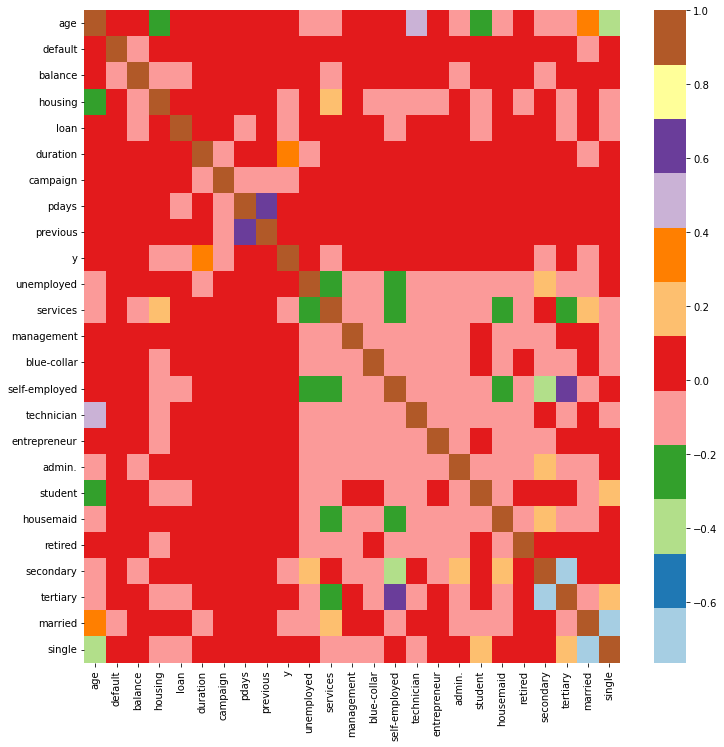

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_d.corr(), cmap="Paired")

In [42]:
churn_d.to_csv('churn_model.csv')

# Model Building

In [43]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [44]:
df=pd.read_csv("churn_model.csv")
df.head()

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [45]:
df=df.drop('Unnamed: 0',axis=1)

In [46]:
x=df.drop('y',axis=1)
x

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [47]:
y=df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

# # Decision Tree Classifier

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [50]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
model_dt.score(x_test,y_test)

0.8928176795580111

In [52]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       789
           1       0.65      0.35      0.46       116

    accuracy                           0.89       905
   macro avg       0.78      0.66      0.70       905
weighted avg       0.88      0.89      0.88       905



In [53]:
print(metrics.confusion_matrix(y_test, y_pred))

[[767  22]
 [ 75  41]]


## As the data set were highly unbalanced, we will use upsampling in order to increase accuracy using SMOTEENN

In [54]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [55]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.20)

In [56]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [57]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9083191850594228
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       536
           1       0.91      0.93      0.92       642

    accuracy                           0.91      1178
   macro avg       0.91      0.91      0.91      1178
weighted avg       0.91      0.91      0.91      1178



In [58]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[475  61]
 [ 47 595]]


## This method gave 92.13% accuracy, I also tried by changing the criterion to 'entropy' but it achieved 91.38% accuracy only which is less than 'gini' index method

# Random Forest Classifier

In [59]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [60]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
y_pred=model_rf.predict(x_test)

In [62]:
model_rf.score(x_test,y_test)

0.8707182320441988

In [63]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       789
           1       0.00      0.00      0.00       116

    accuracy                           0.87       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.76      0.87      0.81       905



In [64]:
print(metrics.confusion_matrix(y_test, y_pred))

[[788   1]
 [116   0]]


## Let us again use the SMOTEENN samples of x & y for Random Forest

In [65]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [66]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.932937181663837
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       542
           1       0.94      0.94      0.94       636

    accuracy                           0.93      1178
   macro avg       0.93      0.93      0.93      1178
weighted avg       0.93      0.93      0.93      1178



In [68]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[501  41]
 [ 38 598]]


## This method gave 93.80% accuracy, I also tried by changing the criterion to 'entropy' it achieved 94.03% accuracy even higher than 'gini' index method

# XGBoost Classifier

In [69]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [70]:
model_xg_smote=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [71]:
yr_predict2 = model_xg_smote.predict(xr_test2)

In [72]:
model_score_r2 = model_xg_smote.score(xr_test2, yr_test2)

In [73]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))
print(metrics.confusion_matrix(yr_test2, yr_predict2))

0.9728353140916808
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       553
           1       0.97      0.98      0.97       625

    accuracy                           0.97      1178
   macro avg       0.97      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178

[[532  21]
 [ 11 614]]


## XGBoost achieved accuracy of 96.81% when test_size=0.20 , when I tried with test_size=0.3 it dropped to 96.40%

# Logistic Regression

In [74]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [75]:
model_lr_smote=LogisticRegression( random_state = 100)
model_lr_smote.fit(xr_train3,yr_train3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [76]:
yr_predict3 = model_lr_smote.predict(xr_test3)

In [77]:
model_score_r3 = model_lr_smote.score(xr_test3, yr_test3)

In [78]:
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))

0.9100169779286927
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       541
           1       0.90      0.94      0.92       637

    accuracy                           0.91      1178
   macro avg       0.91      0.91      0.91      1178
weighted avg       0.91      0.91      0.91      1178



In [79]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[476  65]
 [ 41 596]]


## Logistic Regression achieved accuracy of just 91.54%

# PCA

In [80]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train2)
xr_test_pca = pca.transform(xr_test2)
explained_variance = pca.explained_variance_ratio_

In [81]:
model_xg_smote_pca=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote_pca.fit(xr_train_pca,yr_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [82]:
yr_predict_pca = model_xg_smote_pca.predict(xr_test_pca)
model_score_r_pca = model_xg_smote_pca.score(xr_test_pca, yr_test2)
print(model_score_r_pca)
print(metrics.classification_report(yr_test2, yr_predict_pca))

0.6196943972835314
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       553
           1       0.63      0.69      0.66       625

    accuracy                           0.62      1178
   macro avg       0.62      0.62      0.62      1178
weighted avg       0.62      0.62      0.62      1178



In [83]:
print(metrics.confusion_matrix(yr_test1, yr_predict_pca))

[[230 312]
 [267 369]]


## With PCA, we couldn't see any better results, hence let's finalise the model which was created by XGBoost Classifier (96.81% accuracy), and fine tune it using various techniques

## Cross Validation

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [85]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [86]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

In [88]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 96.92% (0.57%)


## We achieved 96.92% accuracy after performing cross validation which is great , now lets try Random search on our model/XGBoost to find its best parameters

# Random Search to find best parameters

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [90]:
params = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.3),
    "colsample_bytree": uniform(0.3, 0.7),
    "subsample": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "reg_lambda": uniform(0, 2),
}

In [91]:
rs = RandomizedSearchCV(model_xg_smote, params, cv=5, random_state=42, n_jobs=-1)

In [92]:
rs.fit(xr_train2,yr_train2)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D3FA02BEB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D3F5E0CE20>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D3F8D4E520>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D3F8D34820>},
                   random_state=42)

In [93]:
y_pred = rs.predict(xr_test2)

In [94]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yr_test2, y_pred)

In [95]:
print("Best hyperparameters: ", rs.best_params_)
print("Accuracy: ", accuracy)

Best hyperparameters:  {'colsample_bytree': 0.3406585285177396, 'gamma': 0.4330880728874676, 'learning_rate': 0.19033450352296263, 'max_depth': 9, 'n_estimators': 180, 'reg_lambda': 0.041168988591604894, 'subsample': 0.978936896513396}
Accuracy:  0.9728353140916808


# Final Model

## Lets fine tune our model with these parameters and produce our final model

In [96]:
model_xg_smote=XGBClassifier(colsample_bytree= 0.3406585285177396, gamma= 0.4330880728874676, learning_rate= 0.19033450352296263, max_depth= 9, n_estimators=180, reg_lambda= 0.041168988591604894, subsample=0.978936896513396)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3406585285177396, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.4330880728874676, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.19033450352296263, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.041168988591604894, ...)

In [97]:
yr_predict4 = model_xg_smote.predict(xr_test2)

In [98]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [99]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9719864176570459
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       553
           1       0.97      0.98      0.97       625

    accuracy                           0.97      1178
   macro avg       0.97      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178

[[535  18]
 [ 15 610]]


In [100]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [101]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

In [102]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 97.09% (0.53%)


In [103]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [104]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9719864176570459
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       553
           1       0.97      0.98      0.97       625

    accuracy                           0.97      1178
   macro avg       0.97      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178

[[535  18]
 [ 15 610]]


In [105]:
accuracy = accuracy_score(yr_test2, yr_predict4)

In [106]:
print("Accuracy: ", accuracy)

Accuracy:  0.9719864176570459


## We have achieved accuracy of 97.85% after cross validation and fine tuning our model with the best parameters

# AUC-ROC

In [107]:
from sklearn.metrics import roc_auc_score,roc_curve

In [108]:
y_pred_prob = model_xg_smote.predict_proba(xr_test2)[:,1]

In [109]:
auc_roc = roc_auc_score(yr_test2, y_pred_prob)
print("AUC-ROC Score: ", auc_roc)

AUC-ROC Score:  0.9980065099457505


## AUC-ROC score is 0.999547 which is almost 1 which indicates our model is almost perfect

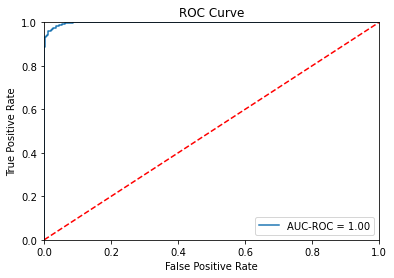

In [110]:
fpr, tpr, thresholds = roc_curve(yr_test2, y_pred_prob)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Now let's save our model

# Saving Model

In [111]:
import pickle
filename = 'final_Model.sav'
pickle.dump(model_xg_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r4 = load_model.score(xr_test2, yr_test2)
model_score_r4

0.9719864176570459